# Emotion Detection

**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


**Exploring Dataset**

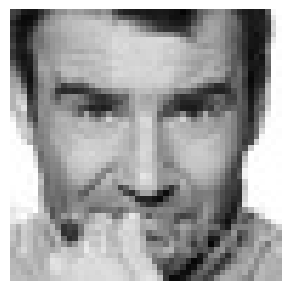

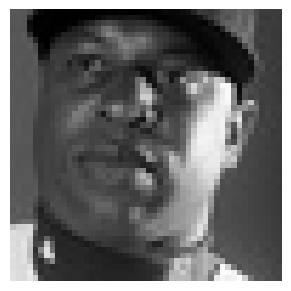

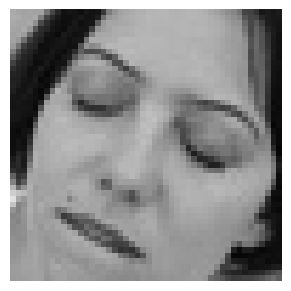

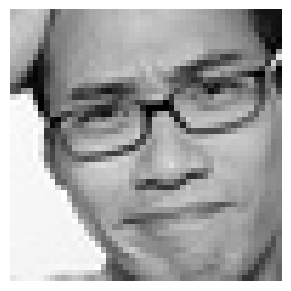

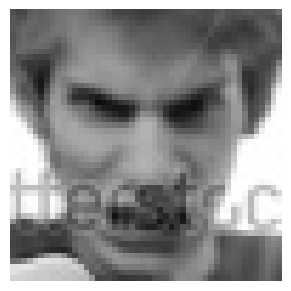

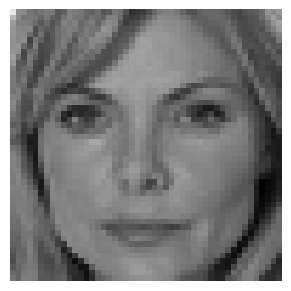

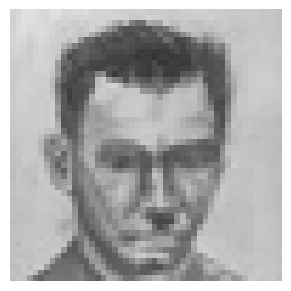

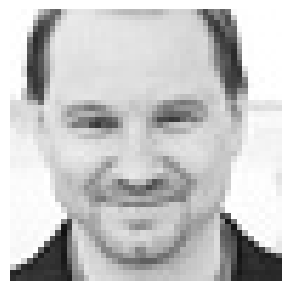

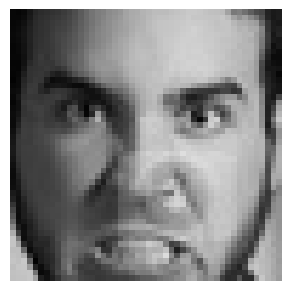

In [2]:
images = glob("/kaggle/input/facial-recognition-dataset/Training/Training/**/**")
# images
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing Data for Training**

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("/kaggle/input/facial-recognition-dataset/Training/Training",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("/kaggle/input/facial-recognition-dataset/Testing/Testing",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


**Defining Model**

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    
    # Convolutional layers
    conv_1 = Convolution(inputs, 64, (3, 3))
    conv_2 = Convolution(conv_1, 32, (5, 5))
    conv_3 = Convolution(conv_2, 128, (3, 3))
    
    # Flatten and dense layers
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    
    # Output layer
    output = Dense(6, activation="softmax")(dense_1)
    
    # Model compilation
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,272,230 (4.85 MB)

 Trainable params: 1,271,270 (4.85 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726592722.383841     117 service.cc:145] XLA service 0x7dffb4009270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726592722.383891     117 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/442 ━━━━━━━━━━━━━━━━━━━━ 1:37:42 13s/step - accuracy: 0.1875 - loss: 2.4556

I0000 00:00:1726592730.521454     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


442/442 ━━━━━━━━━━━━━━━━━━━━ 159s 330ms/step - accuracy: 0.3179 - loss: 1.7784 - val_accuracy: 0.4121 - val_loss: 1.5644
Epoch 2/30
442/442 ━━━━━━━━━━━━━━━━━━━━ 47s 104ms/step - accuracy: 0.4645 - loss: 1.3733 - val_accuracy: 0.4865 - val_loss: 1.3097
Epoch 3/30
442/442 ━━━━━━━━━━━━━━━━━━━━ 47s 104ms/step - accuracy: 0.5209 - loss: 1.2413 - val_accuracy: 0.4593 - val_loss: 1.3519
Epoch 4/30
442/442 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.5473 - loss: 1.1769 - val_accuracy: 0.4991 - val_loss: 1.3566
Epoch 5/30
442/442 ━━━━━━━━━━━━━━━━━━━━ 46s 103ms/step - accuracy: 0.5660 - loss: 1.1299 - val_accuracy: 0.4805 - val_loss: 1.3298
Epoch 6/30
442/442 ━━━━━━━━━━━━━━━━━━━━ 46s 103ms/step - accuracy: 0.5895 - loss: 1.0767 - val_accuracy: 0.5281 - val_loss: 1.2180
Epoch 7/30
442/442 ━━━━━━━━━━━━━━━━━━━━ 46s 104ms/step - accuracy: 0.6040 - loss: 1.0454 - val_accuracy: 0.5446 - val_loss: 1.1763
Epoch 8/30
442/442 ━━━━━━━━━━━━━━━━━━━━ 46s 104ms/step - accuracy: 0.6227 - loss: 0.9966 - va

**Model Evaluation**

In [13]:
model.evaluate(validation_generator)

111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.5029 - loss: 1.5646


[1.2478761672973633, 0.6003962159156799]

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

validation_datagen = ImageDataGenerator()
validation_generator = validation_datagen.flow_from_directory(
    '/kaggle/input/facial-recognition-dataset/Testing/Testing',
    target_size=(48, 48),
    batch_size=64,
    color_mode = 'grayscale',
    class_mode='categorical',  
    shuffle=False  
)

Found 7067 images belonging to 6 classes.


  2/111 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step  

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step


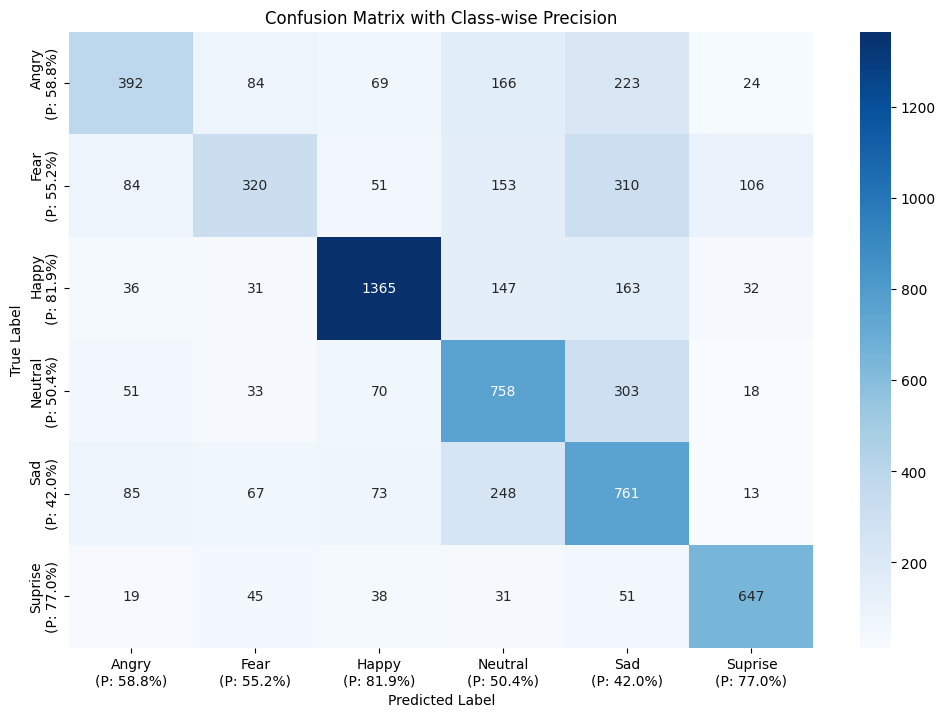

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)
precision_per_class = np.diag(cm) / np.sum(cm, axis=0)


class_labels_with_precision = [f"{label}\n(P: {precision_per_class[i]*100:.1f}%)" for i, label in enumerate(class_labels)]


plt.figure(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_with_precision, yticklabels=class_labels_with_precision)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class-wise Precision')
plt.show()


In [31]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("model_a_weights.weights.h5")